# Pre-processing VDJdb


## 1. Load the packages and data


In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
rawdata = pd.read_excel("vdjdb.xlsx")

In [5]:
rawdata.head(3)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no


In [6]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   complex.id        92771 non-null  int64 
 1   gene              92771 non-null  object
 2   cdr3              92771 non-null  object
 3   v.segm            92670 non-null  object
 4   j.segm            91626 non-null  object
 5   species           92771 non-null  object
 6   mhc.a             92771 non-null  object
 7   mhc.b             92771 non-null  object
 8   mhc.class         92771 non-null  object
 9   antigen.epitope   92771 non-null  object
 10  antigen.gene      92709 non-null  object
 11  antigen.species   92771 non-null  object
 12  reference.id      91260 non-null  object
 13  method            92771 non-null  object
 14  meta              92771 non-null  object
 15  cdr3fix           92771 non-null  object
 16  vdjdb.score       92771 non-null  int64 
 17  web.method  

## 2. Data describtion


From the data type of each column we can see that all are of type **str** except _conplex.id_ and _vdjdb.score_ which are of type **int**.

The data contains a total of 21 columns, we can make an initial filter by the type and meaning of each column.


In [7]:
rawdata_info = pd.read_excel("vdjdb.xlsx", sheet_name="Sheet2")

In [8]:
def display_left_aligned(df):
    style = df.style.set_properties(
        **{
            "text-align": "left",
            "white-space": "pre-wrap",
        }
    )

    style.set_table_styles([{"selector": "th", "props": [("text-align", "left")]}])

    display(style)

In [10]:
display_left_aligned(rawdata_info)

,Column Name,Data Type,Description
0,complex.id,int64,"TCR id: 1. TCR alpha and beta chain records belonging to the same T-cell clone. 2. In case complex.id is equal to 0, a record doesn't have either alpha or beta chain."
1,gene,str,TCR chain as alpha or beta
2,cdr3,str,TCR Complementarity Determining Region 3 (CDR3) amino acid sequence
3,v.segm,str,TCR Variable (V) segment
4,j.segm,str,TCR Joining (J) gene segment
5,species,str,TCR parent species
6,mhc.a,str,First MHC chain allele
7,mhc.b,str,Second MHC chain allele (MHC I: beta2-microglobulin )
8,mhc.class,str,MHC I or MHC II
9,antigen.epitope,str,Amino acid sequence of the epitope


## 3. Data wrangling


### 3.1 Remove columns


Some of the columns contain specific information about the literature sources (reference.id), sequencing methods (method, web.method.seq), collection method (web.method) etc., some of which are related to how **vdjdb.score** is calculated.

Therefore we first remove these columns. Deleted columns are as follows:

- reference.id
- method
- meta
- cdr3fix
- web.method
- web.method.seq
- web.cdr3fix.nc
- web.cdr3fix.unmp


In [11]:
data = rawdata.iloc[:, list(range(0, 12)) + [16]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       92771 non-null  int64 
 1   gene             92771 non-null  object
 2   cdr3             92771 non-null  object
 3   v.segm           92670 non-null  object
 4   j.segm           91626 non-null  object
 5   species          92771 non-null  object
 6   mhc.a            92771 non-null  object
 7   mhc.b            92771 non-null  object
 8   mhc.class        92771 non-null  object
 9   antigen.epitope  92771 non-null  object
 10  antigen.gene     92709 non-null  object
 11  antigen.species  92771 non-null  object
 12  vdjdb.score      92771 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 9.2+ MB


### 3.2 Null values

The colums v.segm and j.segm have 101, 1145 null values respectively. Due to the fact


In [128]:
data.isnull().sum()

complex.id            0
gene                  0
cdr3                  0
v.segm              101
j.segm             1145
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
dtype: int64

In [14]:
null_count = data.isnull().any(axis=1).sum()
print(f"The number of null rows: {null_count}")

The number of null rows: 1221


### 3.3 Unique values


Then, we check the unique value counts in the remaining columns.


In [15]:
def plot_unique_value_counts(df, wid):
    unique_counts = df.nunique()
    showplt = 1
    ##showplt = input('If you want to show a bar chart, please input 1.\nElse, input 0:\n')
    if showplt:
        plt.figure(figsize=(6, 4))
        plt.bar(range(len(unique_counts)), unique_counts, width=wid)
        plt.title("Unique Value Counts")
        plt.xlabel("Columns")
        plt.ylabel("Unique Value Counts")
        plt.xticks(range(len(unique_counts)), unique_counts.index, rotation=45)

    for i, v in enumerate(unique_counts):
        plt.text(i, v + 0.1, str(v), ha="center", va="bottom")

    return unique_counts

complex.id         30595
gene                   2
cdr3               68994
v.segm               224
j.segm                71
species                3
mhc.a                119
mhc.b                 45
mhc.class              2
antigen.epitope     1169
antigen.gene         268
antigen.species       42
vdjdb.score            4
dtype: int64

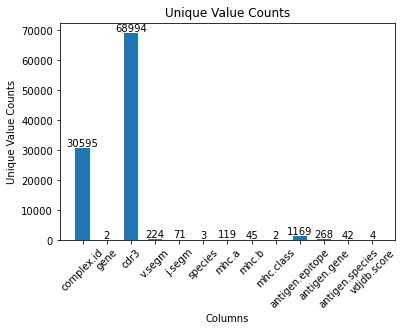

In [16]:
plot_unique_value_counts(data, 0.6)

cdr3               68994
antigen.epitope     1169
dtype: int64

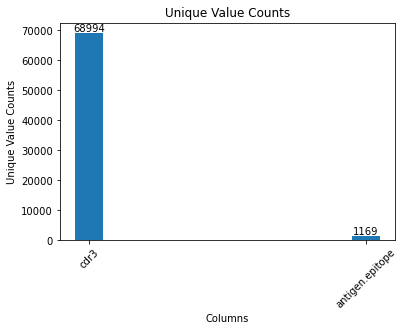

In [17]:
plot_unique_value_counts(data[["cdr3", "antigen.epitope"]], 0.1)

### 3.4 complex.id

Due to the fact that TCR alpha and beta chain records belonging to the same T-cell clone, and in case the complex.id is equal to zero, a record doesn't have either alpha or beta chain, we count both zero and non-zero values, and then check if the non-zero values occur twice.


In [18]:
print(
    f"1. The number of rows in the VDJdb: {len(data)}\n"
    f"   The number of null rows: {null_count}\n"
    f"   The number of duplicate rows: {len(data)-data.drop_duplicates().shape[0]}"
)

zeros = data[data["complex.id"] == 0]
zeros_count = zeros["complex.id"].count()
zeros_a_count = zeros[zeros["gene"] == "TRA"]["gene"].count()
zeros_b_count = zeros[zeros["gene"] == "TRB"]["gene"].count()
zeros_unique_count = zeros.drop_duplicates().shape[0]
zeros_null = zeros.isnull().any(axis=1).sum()
print(
    "\n2. The zero complex.id info:"
    f"\n   The number of zero complex.id: {zeros_count}"
    f"\n   The number of the alpha chain: {zeros_a_count}"
    f"\n   The number of the beta chain: {zeros_b_count}"
    f"\n   The number of non-duplicate rows: {zeros_unique_count}"
    f"\n   The number of duplicate rows: {zeros_count-zeros_unique_count}"
    f"\n   The number of null rows: {zeros_null}"
)


non_zeros = data[data["complex.id"] != 0]
non_zeros_count = non_zeros["complex.id"].count()
non_zeros_pair_count = non_zeros["complex.id"].value_counts()
non_zeros_unique_count = non_zeros.drop_duplicates().shape[0]
non_zeros_null = non_zeros.isnull().any(axis=1).sum()
print(
    "\n3. The non-zero complex.id info:"
    f"\n   The number of non-zero complex.id: {non_zeros_count}"
    f"\n   The number of non-duplicate rows: {non_zeros_unique_count}"
    f"\n   The number of duplicate rows: {non_zeros_count-non_zeros_unique_count}"
)

# Check if all non-zero values occur twice
pairs_check = all(non_zeros_pair_count == 2)
if pairs_check:
    print(f"\n   All non-zero values occur in pairs." f"\n   The number of the paired values is {len(non_zeros_pair_count)}")
else:
    print("\n   There are non-paired values among non-zero values.")

# Find non-duplicate rows with null values in non_zeros
complex_id_with_null = non_zeros.loc[non_zeros.isnull().any(axis=1), ["complex.id"]]

print(f"\n   The number of null rows: {non_zeros_null}" f"\n   The number of duplicate rows with null: " f"{non_zeros_null-complex_id_with_null.drop_duplicates().shape[0]}")

1. The number of rows in the VDJdb: 92771
   The number of null rows: 1221
   The number of duplicate rows: 4245

2. The zero complex.id info:
   The number of zero complex.id: 31583
   The number of the alpha chain: 7455
   The number of the beta chain: 24128
   The number of non-duplicate rows: 27338
   The number of duplicate rows: 4245
   The number of null rows: 326

3. The non-zero complex.id info:
   The number of non-zero complex.id: 61188
   The number of non-duplicate rows: 61188
   The number of duplicate rows: 0

   All non-zero values occur in pairs.
   The number of the paired values is 30594

   The number of null rows: 895
   The number of duplicate rows with null: 32


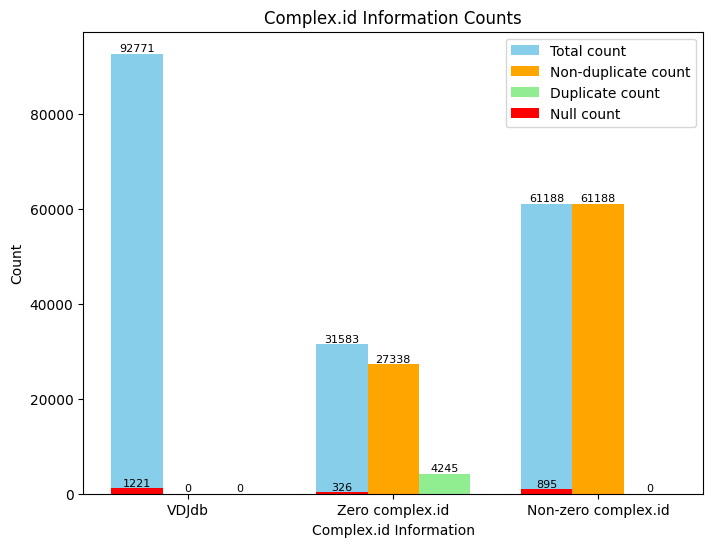

In [134]:
# complex.id info visualization
# Define data
categories = ["VDJdb", "Zero complex.id", "Non-zero complex.id"]
counts = [len(data), zeros_count, non_zeros_count]
unique_counts = [0, zeros_unique_count, non_zeros_unique_count]
duplicate_counts = [0, zeros_count - zeros_unique_count, non_zeros_count - non_zeros_unique_count]
null_counts = [null_count, zeros_null, non_zeros_null]

# Create a bar chart
plt.figure(figsize=(8, 6))
bar_width = 0.25
index = range(len(categories))

bars1 = plt.bar(index, counts, color="skyblue", label="Total count", width=bar_width)
bars2 = plt.bar([i + bar_width for i in index], unique_counts, color="orange", label="Non-duplicate count", width=bar_width)
bars3 = plt.bar([i + 2 * bar_width for i in index], duplicate_counts, color="lightgreen", label="Duplicate count", width=bar_width)
barsnull = plt.bar(index, null_counts, color="red", label="Null count", width=bar_width)


# Add labels and legend
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, "%d" % int(height), ha="center", va="bottom", fontsize=8)


autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(barsnull)

plt.xlabel("Complex.id Information")
plt.ylabel("Count")
plt.title("Complex.id Information Counts")
plt.xticks([i + bar_width for i in index], categories)
plt.legend()

Next, we check if the paired records of non-zero complex.id have the same information for other columns expect the column 'gene'.


In [19]:
grouped = non_zeros.groupby("complex.id")

# Create an empty list to store inconsistent complex.id
not_consistent_ids = []

for group_name, group_data in grouped:
    # Compare columns 6 to 13 for consistency
    columns_to_compare = group_data.columns[5:13]
    comparison_result = group_data.iloc[0][columns_to_compare].equals(group_data.iloc[1][columns_to_compare])

    if not comparison_result:
        not_consistent_ids.append(group_name)

if not_consistent_ids:
    print("Inconsistent complex.id:", not_consistent_ids)
else:
    print(f"All {', '.join(non_zeros.columns[5:13])} columns of the same complex.id are consistent.")

All species, mhc.a, mhc.b, mhc.class, antigen.epitope, antigen.gene, antigen.species, vdjdb.score columns of the same complex.id are consistent.


## 4. Inference


Based on various measures we could use to calculate the distance/similarity matrix, the columns we choose as the input are different. Besides we should calculate these metrics for the alpha and beta chains seperately in the further study.

**Therefore we don't have to remove the lines with null values and complex.id values that are equal to 0 right away.**


### 4.1 TCRdist3

Tcrdist3 only requires 3 input columns for single chain analysis (i.e., for beta chain cdr3_b_aa and v_b_gene, j_b_gene) and 6 columns for paired chain analysis (i.e., cdr3_b_aa, v_b_gene, j_b_gene, cdr3_a_aa, v_a_gene, and j_a_gene).

A unique feature of tcrdist3 is that all of the parameters of the distance metric can be adjusted (e.g. alpha-chain only, weights on CDR loops, etc.) or completely new user-defined metrics can be provided to calculate pairwise distances. The package comes with a distance based on Needleman-Wunsch global sequence alignment and a BLOSUM62 similarity matrix, as well as the Levenshtein/edit distance, which is employed by other TCR analysis packages such as _TCRNET/VDJtools_, _ALICE_, and _GLIPH2_.

https://tcrdist3.readthedocs.io/en/latest/index.html

https://github.com/kmayerb/tcrdist3


### 4.2 GLIPH

Input TCR data are formated as follow
#CDR3b TRBV TRBJ CDR3a subject:condition count
CSARDQGGAGNQPQHF TRBV20-1 TRBJ1-5 CAVGVGYKLSF 01/0906:MtbLys 1

All fields are tab-delimited except that subject and condition are delimited with ":". Condition can be anything such as tissue type, cell subset or treatment et al. CDR3b, TRBV, subject, and count are required. Other fields can be replaced with "NA". A demo input TCR dataset can be found at the link [TCR](http://50.255.35.37:8080/demo).

Huang, Huang, et al. "Analyzing the Mycobacterium tuberculosis immune response by T-cell receptor clustering with GLIPH2 and genome-wide antigen screening." Nature Biotechnology 38.10 (2020): 1194-1202. [Link](https://www.nature.com/articles/s41587-020-0505-4)

GLIPH1 works well on small and clean data sets. However, as data sets are becoming larger and noisier, the algorithm tends to generate large clusters of mixed specificities. [Link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10035763/)

http://50.255.35.37:8080/tools

https://github.com/immunoengineer/gliph


### 4.3 GIANA

Input of GIANA is flexible. The first column is kept for CDR3 amino acid sequence. If TRBV allele information is enabled (by default), the second column is required to be TRBV genes. As the TCR-seq data provided by the Adaptive Biotechnologies does not comply with the IMGT format, we provide the R code (ProcessAdaptiveFile.R) to convert the Adaptive data input to standard format. In the output, GIANA inserts a column between the first and the second column as the cluster IDs. Other columns in the input data may contain any information, and will be kept in the final output.

https://github.com/s175573/GIANA


# Task3


## 1. GIANA


### 1.1 Format the data


#### 1.1.1 Add 'clone_id'

Add a column of **'clone_id'** to all rows in data. And the value is:

- zero complex.id records: clone*0*{number of rows in the original record}
- non-zero complex.id records: complex*1*{clone.id of the original record}


In [20]:
# Add a column of 'clone_id' to all rows
data["clone_id"] = ""

# Give the 'clone_id' record with zero complex.id the value:
# clone_0_{number of rows in the original record}
zero_complex_ids = data[data["complex.id"] == 0].index
data.loc[zero_complex_ids, "clone_id"] = zero_complex_ids.map(lambda x: f"clone_0_{x}")

# Give the 'clone_id' record with non-zero complex.id the value:
# clone_1_{complex.id of the original record}
non_zero_complex_ids = data[data["complex.id"] != 0]["complex.id"].unique()
for complex_id in non_zero_complex_ids:
    indices = data[data["complex.id"] == complex_id].index
    data.loc[indices, "clone_id"] = f"clone_1_{complex_id}"

<ipython-input-20-b50003e422d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clone_id"] = ""
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


#### 1.1.2 Duplicate complex.id 0 records

Duplicate the records with complex.id of 0 and modify the gene columns.


In [21]:
data_copy = data[data["complex.id"] == 0].copy()
data_copy["gene"] = data_copy["gene"].map({"TRA": "TRB", "TRB": "TRA"})

In [22]:
# set all columns except 'complex.id', 'clone_id' and the modified 'gene' column to e,.
for col in data_copy.columns:
    if col not in ["complex.id", "species", "antigen.gene", "count", "clone_id", "gene"]:
        data_copy[col] = np.nan

# Merge original and copied data
data_copy = pd.concat([data, data_copy], ignore_index=True)

In [23]:
data_copy[data_copy["complex.id"] != 0]

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,clone_id
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2.0,clone_1_1
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2.0,clone_1_1
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2.0,clone_1_2
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2.0,clone_1_2
5,3,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2.0,clone_1_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,0.0,clone_1_30592
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,2.0,clone_1_30593
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,2.0,clone_1_30593
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,0.0,clone_1_30594


#### 1.1.3 Add 'count'

Set 'count' of all rows to 1


In [24]:
data_copy["count"] = 1

#### 1.1.4 Select the columns for GIANA input

I changed the GIANA package to accept arrays as input instead of a file name which could only be run from the terminal.

The header and first line of a typical input for a beta-chain analysis would look like this:

| subject | epitope | count | v_b_gene  | j_b_gene    |
| ------- | ------- | ----- | --------- | ----------- |
| s1      | NP      | 1     | TRBV1\*01 | TRBJ1-1\*01 |

| cdr3_b_aa           | cdr3_b_nucseq                                             |
| ------------------- | --------------------------------------------------------- |
| CACDSLGDKSSWDTRQMFF | TGTGCCTGTGACTCGCTGGGGGATAAGAGCTCCTGGGACACCCGACAGATGTTTTTC |

- GIANA only requires 1 input columns for chain analysis, which is the `cdr3_b_aa`.

- The column `v_b_gene`, `count` are optional.

Note that GIANA only supports analysis of TRBV sequences.

In [25]:
df = data_copy.iloc[:, list(range(0, 6)) + [9, 12, 13, 14]]

In [26]:
df[df["complex.id"] != 0]

,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,vdjdb.score,clone_id,count
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,2.0,clone_1_1,1
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,2.0,clone_1_1,1
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,2.0,clone_1_2,1
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,2.0,clone_1_2,1
5,3,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,FLKEKGGL,2.0,clone_1_3,1
...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,PQQPFPQPEQPFP,0.0,clone_1_30592,1
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,PQQPFPQPEQPFP,2.0,clone_1_30593,1
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,PQQPFPQPEQPFP,2.0,clone_1_30593,1
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,PQQPFPQPEQPFP,0.0,clone_1_30594,1


In [27]:
df[df["complex.id"] == 0]

,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,vdjdb.score,clone_id,count
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,2.0,clone_0_2,1
11,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEQGGL,2.0,clone_0_11,1
18,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKETGGL,2.0,clone_0_18,1
25,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEMGGL,2.0,clone_0_25,1
30,0,TRB,CASSFGVEDEQYF,TRBV7-2*01,TRBJ2-7*01,HomoSapiens,LQPFPQPELPYPQPQ,1.0,clone_0_30,1
...,...,...,...,...,...,...,...,...,...,...
124349,0,TRB,NaN,NaN,NaN,HomoSapiens,NaN,NaN,clone_0_92664,1
124350,0,TRB,NaN,NaN,NaN,HomoSapiens,NaN,NaN,clone_0_92665,1
124351,0,TRB,NaN,NaN,NaN,HomoSapiens,NaN,NaN,clone_0_92666,1
124352,0,TRA,NaN,NaN,NaN,HomoSapiens,NaN,NaN,clone_0_92667,1


#### 1.1.5 Fill null values and pivot wider

Based on the column 'gene', we pivot the data wider so that it looks like the standard input. Meanwhile, we change the name of the columns as the GIANA requires.


**Fill the null values in antigen.gene with the string 'empty'**


In [28]:
df["antigen.epitope"].fillna("empty", inplace=True)
df.isnull().sum()

D:\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


complex.id             0
gene                   0
cdr3               31583
v.segm             31684
j.segm             32728
species                0
antigen.epitope        0
vdjdb.score        31583
clone_id               0
count                  0
dtype: int64

In [29]:
df_wide = df.pivot_table(
    index=["clone_id", "complex.id", "species", "antigen.epitope", "vdjdb.score", "count"], columns="gene", values=["cdr3", "v.segm", "j.segm"], aggfunc="first"
).reset_index()
# df_wide.columns
df_wide.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in df_wide.columns]

In [30]:
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62177 entries, 0 to 62176
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   clone_id         62177 non-null  object 
 1   complex.id       62177 non-null  int64  
 2   species          62177 non-null  object 
 3   antigen.epitope  62177 non-null  object 
 4   vdjdb.score      62177 non-null  float64
 5   count            62177 non-null  int64  
 6   cdr3_TRA         38049 non-null  object 
 7   cdr3_TRB         54722 non-null  object 
 8   j.segm_TRA       37004 non-null  object 
 9   j.segm_TRB       54622 non-null  object 
 10  v.segm_TRA       37957 non-null  object 
 11  v.segm_TRB       54713 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 5.7+ MB


In [147]:
df_wide.columns = ["clone_id", "complex_id", "organism", "epitope", "vdjdb_score", "count", "cdr3_a_aa", "cdr3_b_aa", "j_a_gene", "j_b_gene", "v_a_gene", "v_b_gene"]

In [31]:
len(df_wide)

62177

In [37]:
len(df_wide[df_wide["complex_id"] == 0])

KeyError: 'complex_id'

In [35]:
len(df_wide[df_wide["complex_id"] != 0])

KeyError: 'complex_id'

**Check if any rows are deleted:**


**Note**: For the initial trials, we could see that there are some rows with non-zero complex_id missing. Missing values in 'complex_id':

        [ 178,  187,  188,  189,  190,  201,  202,  203,  229,  234,  262,306,  308,  310,  314,

        320,  322, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634]


By checking the data in the original dataset, we figured out that it's due to the null values in the 'antigen.gene' ('epitope') column. **There should not be null values in the index columns** that will be used for **pivot_table**.

Therefore we decided to:

- fill the null values in 'antigen.gene' with the string 'empty'.
- change those 'empty' strings in the 'epitope' back to null after the pivot wide step.


In [ ]:
print(
    f"1. The number of rows in the pivot wide data: {len(df_wide)}\n"
    "\n2. The zero complex.id info:"
    f"\n   The number of zero complex.id in the VDJdb: {zeros_count}"
    f"\n   The number of zero complex.id in the pivot wide data: {len(df_wide[df_wide['complex_id'] ==0])}\n"
    "\n3. The non-zero complex.id info:"
    f"\n   The number of paired non-zero complex.id: {int(non_zeros_count/2)}"
    f"\n   The number of non-zero complex.id in the pivot wide data: {len(df_wide[df_wide['complex_id'] !=0])}"
)

In [ ]:
# Create a Series containing all values from 1 to 30594
all_values = pd.Series(range(1, 30595))

# Found a value that is not in the 'complex_id' column
missing_values = all_values[~all_values.isin(df_wide["complex_id"])]

print("Missing values in 'complex_id' from 1 to 30594:")
print(missing_values)

**Change those 'empty' strings in the 'epitope' column back to null**


In [ ]:
df_wide.replace("empty", np.nan, inplace=True)

In [ ]:
df_filtered = df_wide[df_wide["organism"].isin(["HomoSapiens", "MusMusculus"])].copy()

df_filtered.loc[df_filtered["organism"] == "HomoSapiens", "organism"] = "human"
df_filtered.loc[df_filtered["organism"] == "MusMusculus", "organism"] = "mouse"
df_filtered.head(3)

#### 1.1.7 Formatted input


In [ ]:
# Sort by value of column 'epitope'
df_filtered.sort_values(by="epitope", inplace=True)

df_filtered.info()

In [ ]:
alpha_input = df_filtered.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 10]]
beta_input = df_filtered.iloc[:, [0, 1, 2, 3, 4, 5, 7, 9, 11]]

In [ ]:
alpha_input.head()

In [ ]:
beta_input.head()

### 1.2 Similarity/Distance matrix


#### 1.2.1 Different inputs


**Inputs for parwise calculation:**


In [ ]:
mouse = df_filtered[df_filtered["organism"] == "mouse"]
human = df_filtered[df_filtered["organism"] == "human"]

**Inputs for separate calculation:**


In [33]:
mouse_alpha = alpha_input[alpha_input["organism"] == "mouse"]
mouse_beta = beta_input[alpha_input["organism"] == "mouse"]
human_alpha = alpha_input[alpha_input["organism"] == "human"]
human_beta = beta_input[alpha_input["organism"] == "human"]

NameError: name 'alpha_input' is not defined

**Delete null values:**


In [161]:
mouse = mouse.dropna()
mouse_alpha = mouse_alpha.dropna()
mouse_beta = mouse_beta.dropna()

human = human.dropna()
human_alpha = human_alpha.dropna()
human_beta = human_beta.dropna()

**Number of rows for different vdjdb scores of different inputs:**


In [162]:
# Create a Series containing the vdjdb_score distribution for each dataset
vdjdb_score_counts = {}

datasets = [mouse, mouse_alpha, mouse_beta, human, human_alpha, human_beta]
labels = ["Mouse", "Mouse Alpha", "Mouse Beta", "Human", "Human Alpha", "Human Beta"]

for dataset, label in zip(datasets, labels):
    vdjdb_score_counts[label] = dataset["vdjdb_score"].value_counts()

# Convert dictionary to DataFrame
vdjdb_score_counts_df = pd.DataFrame(vdjdb_score_counts)
vdjdb_score_counts_df = vdjdb_score_counts_df.rename_axis("vdjdb score")
vdjdb_score_counts_df

,Mouse,Mouse Alpha,Mouse Beta,Human,Human Alpha,Human Beta
vdjdb score,,,,,,
0.0,1282,1322,1810,25710,31970,42981
1.0,834,859,1060,698,1450,4197
2.0,6,6,50,541,669,1485
3.0,62,62,84,629,661,914


In [163]:
human_01 = human[human["vdjdb_score"].isin([0, 1])]
human_23 = human[human["vdjdb_score"].isin([2, 3])]
mouse_01 = mouse[mouse["vdjdb_score"].isin([0, 1])]
mouse_23 = mouse[mouse["vdjdb_score"].isin([2, 3])]

#### 1.2.2 Define functions


In [164]:
import matplotlib.colors

def plot_heatmap(df, title_suffix, ax):
    df_01 = np.zeros((len(df), len(df)))

    for i, seq1 in enumerate(df['cdr3_b_aa']):
        for j, seq2 in enumerate(df['cdr3_b_aa']):
            if seq1 == seq2:
                df_01[i, j] = 1  # Set to 1 for the same epitopes
            else:
                df_01[i, j] = 0  # Set to 0 for different epitopes

    cmap = plt.cm.viridis  # Use viridis colormap directly
    colors = cmap([0.99, 0.1])  # Select lighter and darker colors from viridis colormap

    ax.imshow(df_01, cmap=matplotlib.colors.ListedColormap(colors), interpolation='nearest', origin='upper', extent=[
    0, df_01.shape[1], df_01.shape[0], 0])

    ax.set_title(f'Cluster Matrix {title_suffix}\n', fontsize=20)
    ax.set_xticks(np.arange(0, len(df), len(df)//10))
    ax.set_xticklabels(np.arange(0, len(df), len(df)//10))
    ax.set_yticks(np.arange(0, len(df), len(df)//10))
    ax.set_yticklabels(np.arange(0, len(df), len(df)//10))
    ax.set_xlabel('Index')
    ax.set_ylabel('Index')

#### 1.2.3 Alpha and beta chains separately

In [165]:
human_alpha_01 = human_alpha[human_alpha["vdjdb_score"].isin([0, 1])]
human_alpha_23 = human_alpha[human_alpha["vdjdb_score"].isin([2, 3])]
human_beta_01 = human_beta[human_beta["vdjdb_score"].isin([0, 1])]
human_beta_23 = human_beta[human_beta["vdjdb_score"].isin([2, 3])]

mouse_alpha_01 = mouse_alpha[mouse_alpha["vdjdb_score"].isin([0, 1])]
mouse_alpha_23 = mouse_alpha[mouse_alpha["vdjdb_score"].isin([2, 3])]
mouse_beta_01 = mouse_beta[mouse_beta["vdjdb_score"].isin([0, 1])]
mouse_beta_23 = mouse_beta[mouse_beta["vdjdb_score"].isin([2, 3])]

In [166]:
df_mouse_23 = mouse_beta_23[["cdr3_b_aa", "v_b_gene"]].dropna()
df_human_23 = human_beta_23[["cdr3_b_aa", "v_b_gene"]].dropna()

### 1.2.4 Format the data

Since the package used is only a command line tool, I added a function in the source code to accept raw data (instead of raw file) as input.
The format is just a list of strings. Each string is one row, with all columns being tab separated.

In [167]:
df_mouse_23_lines = df_mouse_23.to_string(index=False, header=False).split('\n')
df_human_23_lines = df_human_23.to_string(index=False, header=False).split('\n')

df_mouse_23_input = ['\t'.join(l.split()) for l in df_mouse_23_lines]
df_human_23_input = ['\t'.join(l.split()) for l in df_human_23_lines]

### 1.2.5 GIANA Calculation

In [168]:
from giana.giana_new import CalculateGianaScores

In [1]:
# cutoff - Threshold to cut on distance
# thr_s - Threshold for Smith-Waterman alignment score
# thr_v - Threshold for variable gene comparison
# ST - Starting position of CDR3 sequence. The first ST letters are omitted.
# Gap - Gap penalty for Smith-Waterman alignment
# EE - Whether to perform Smith-Waterman alignment after isometric encoding
# VV - Whether to use variable gene information
# GPU - Whether to use GPU for calculation
# verbose - Whether to print intermediate information

df_mouse_23_results = CalculateGianaScores(df_mouse_23_input, cutoff=2, thr_s=6, thr_v=6, ST=3, Gap=-3, EE=True, VV=True, GPU=True, verbose=False)
df_human_23_results = CalculateGianaScores(df_human_23_input, cutoff=2, thr_s=6, thr_v=6, ST=3, Gap=-3, EE=True, VV=True, GPU=True, verbose=False)

NameError: name 'CalculateGianaScores' is not defined

### 1.2.6 CDR Clusters

In [170]:
df_mouse_23_cluster = pd.DataFrame([x[:-1].split('\t') for x in df_mouse_23_results], columns=["cdr3_b_aa", "cluster", "v_b_gene"])
df_human_23_cluster = pd.DataFrame([x[:-1].split('\t') for x in df_human_23_results], columns=["cdr3_b_aa", "cluster", "v_b_gene"])

In [2]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

plot_heatmap(df_mouse_23_cluster, 'mouse_23', ax)

NameError: name 'plt' is not defined

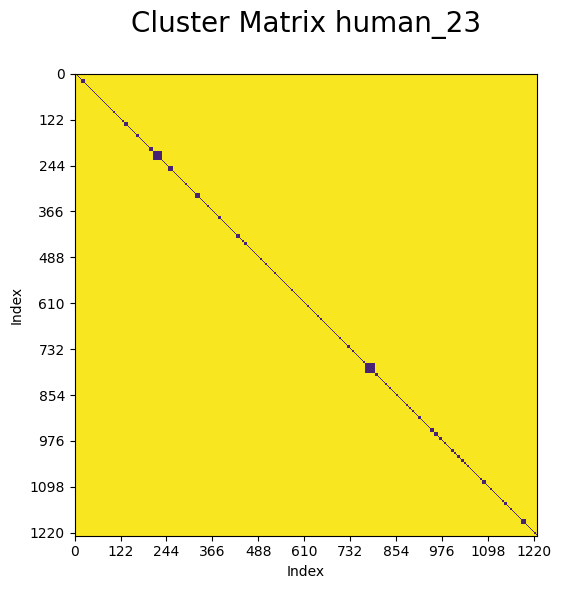

In [172]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

plot_heatmap(df_human_23_cluster, 'human_23', ax)